plot profiles

In [31]:
# python modules
import sys
import copy
import re
import random
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats


In [32]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis


In [33]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"


In [34]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}


In [35]:
agent_fullname = {'sp':'Spermine(4+)',
                  'spd':'Spermidine(3+)',
                  'CoH':'Cobalt Hexammine(3+)',
                  'PEG':'PEG 8000',
                  'HP1a':'HP1$\\alpha$',
                  'HP1bSUV':'HP1$\\beta$+tSUV',
                  'LKH':'Linker histone1',
                  'Ki67':'Ki67',
                  'FUS':'FUS',
                  'Mg':'Magnesium',
                  'Ca':'Calcium'}


In [36]:
### parameters for plot profiles
domain_param = {}
for domain in ['TSS', 'TSS-TTS']:
    profile_len = 1000
    moving_average_win = 20
    pad_len = moving_average_win/2

    if domain == 'TSS':
        #moving_average_win = 100
        #pad_len = moving_average_win/2
        #up_win = 2500
        #down_win = 5000
        up_win = 1000
        down_win = 2000
        left_len = int(round(up_win*float(profile_len)/(up_win+down_win+1)))
        right_len = profile_len - left_len - 1
        offset = -left_len
        xtick_locs = [-left_len + pad_len, 0, right_len - pad_len]
        #xtick_labels = ["-2.5kb", "TSS", "5kb"]
        xtick_labels = ["-1kb", "TSS", "2kb"]


    elif domain == 'TSS-TTS':
        #moving_average_win = 20
        #pad_len = moving_average_win/2
        domain_frac = 0.6
        margin_frac = 1.0 - domain_frac
        up_win = 5000
        down_win = 2500
        left_len = int((margin_frac*profile_len)*(float(up_win)/(up_win + down_win)))
        right_len = int((margin_frac*profile_len)*(float(down_win)/(up_win + down_win)))
        offset = -left_len
        xtick_locs = [-left_len+pad_len,
                      0,
                      int(domain_frac*profile_len),
                      int(domain_frac*profile_len) + right_len - pad_len ]
        xtick_labels = ["-5kb", "TSS", "TTS", "2.5kb"]


    param = {}
    param['moving_average_win'] = moving_average_win
    param['profile_len'] = profile_len
    param['up_win'] = up_win
    param['down_win'] = down_win
    param['pad_len'] = pad_len
    param['left_len'] = left_len
    param['right_len'] = right_len
    param['offset'] = offset
    param['xtick_locs'] = xtick_locs
    param['xtick_labels'] = xtick_labels

    if domain == 'TSS-TTS':
        param['domain_frac'] = domain_frac
        param['margin_frac'] = margin_frac

    domain_param[domain] = param
    

In [37]:
### chromosome choices
#chr_choices = cell_chrnames['H1']
chr_choices = ['chr1']

In [38]:
### set plot parameters
param = domain_param['TSS']

In [39]:
### load profile files
gtab_path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/'

dinfo_dkey = {'H1_NCP_sp_1rep_deep_chr(\d+|[XY])_171win25step_score_table_TSS_profile.txt.gz':
              {'H1_NCP_sp_8_1rep_deep':'Condensability',
              'H3K9ac':'H3K9ac',
              'H3K27ac':'H3K27ac',
              'H3K4me3':'H3K4me3'}
              }

dkey_geneID_profile = load_file.read_profile_batch (dinfo_dkey,
                                                    data_path=gtab_path)

loading H1_NCP_sp_1rep_deep_chr10_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr11_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr12_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr13_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr14_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr15_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr16_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr17_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr18_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr19_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr1_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr20_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr21_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr22_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr2_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr3_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr4_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr5_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr6_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr7_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr8_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chr9_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chrX_171win25step_score_table_TSS_profile.txt.gz


loading H1_NCP_sp_1rep_deep_chrY_171win25step_score_table_TSS_profile.txt.gz


Done


In [40]:
### read RNA-seq data
RNAseq_path = '/Users/sangwoopark/jhu_rockfish/HumanEpigeneticData/RNAseq/'
RNAseq_fname = 'ENCFF174OMR.tsv'
geneID_FPKM = load_file.read_ENCODE_RNA_seq(RNAseq_path + RNAseq_fname)

Condensability


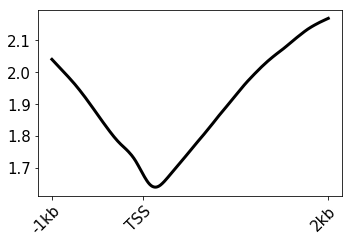

H3K27ac


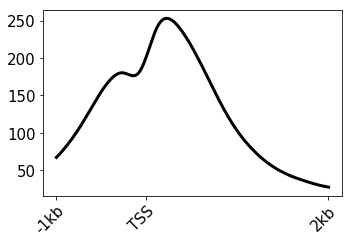

H3K4me3


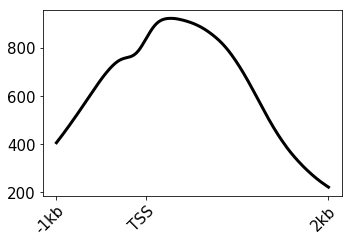

H3K9ac


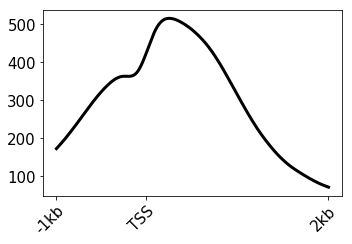

1

In [41]:
# plot mean profile
for dkey in sorted(dkey_geneID_profile):
    print dkey
    #geneID_profile = statis.NN_interpolate_dict(dkey_geneID_profile[dkey])
    geneID_profile = dkey_geneID_profile[dkey]
    mprofile = np.nanmean(geneID_profile.values(), axis=0)
    mprofile = statis.moving_average(mprofile, param['moving_average_win'])

    graphics.plot_profile (mprofile,
                           offset=param['offset'],
                           pad_len=param['pad_len'],
                           xtick_locs=param['xtick_locs'],
                           xtick_labels=param['xtick_labels'])
1                           

Condensability


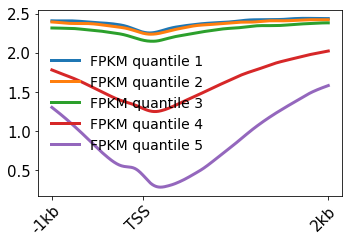

H3K27ac


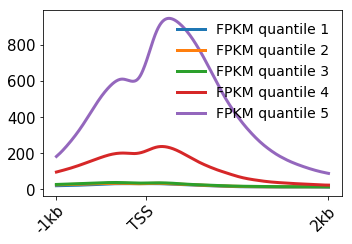

H3K4me3


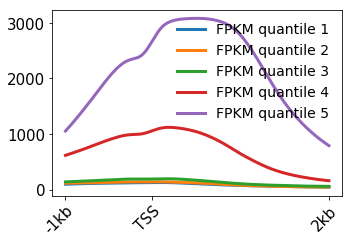

H3K9ac


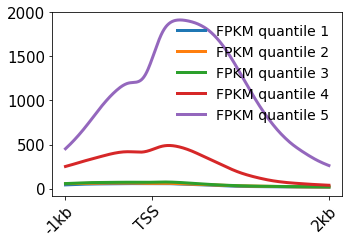

In [42]:
# partition quantiles according to gene expression level [Fig.1e, Extended Data Fig.3c]
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for dkey in sorted(dkey_geneID_profile):
    print dkey
    #geneID_profile = statis.NN_interpolate_dict(dkey_geneID_profile[dkey])
    geneID_profile = dkey_geneID_profile[dkey]
    geneIDs = set(geneID_profile.keys()) & set(geneID_FPKM.keys())
    q_geneIDs = statis.quantile_dict({geneID:geneID_FPKM[geneID] for geneID in geneIDs}, 5)

    profiles = []
    labels = []
    for i in range(len(q_geneIDs)):
        profile = np.nanmean([geneID_profile[geneID] for geneID in q_geneIDs[i]], axis=0)
        profile = statis.moving_average(profile, param['moving_average_win'])
        profiles.append(profile)
        labels.append('FPKM quantile %d' % (i+1))
        
    graphics.plot_profile_multiple (profiles,
                                    colors=colors,
                                    alphas=[1]*len(profiles),
                                    lws=[3]*len(profiles),
                                    labels=labels,
                                    offset=param['offset'],
                                    pad_len=param['pad_len'],
                                    xtick_locs=param['xtick_locs'],
                                    xtick_labels=param['xtick_labels'],
                                    note = 'TSS_%s' % dkey,
                                    fig_width=5,
                                    fig_height=3.5,
                                    save_path='./data/',
                                    save=True)
        
    

H3K27ac


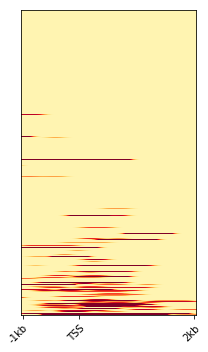

Condensability


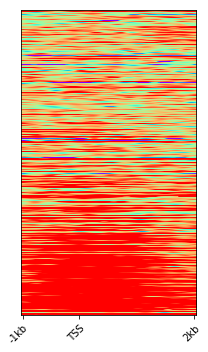

In [70]:
# plot profile heatmap [Fig.1e]
dkey_cmap = {'Condensability':'rainbow_r',
             'H3K27ac':'YlOrRd'}

for dkey in dkey_cmap:
    print dkey
    #geneID_profile = statis.NN_interpolate(dkey_geneID_profile[dkey])
    geneID_profile = dkey_geneID_profile[dkey]
    geneIDs = set(geneID_profile.keys()) & set(geneID_FPKM.keys())
    FPKM_geneID = sorted([(geneID_FPKM[geneID], geneID) for geneID in geneIDs])
    geneIDs = [geneID for FPKM, geneID in FPKM_geneID]
    profiles = []
    for geneID in geneIDs:
        profile = geneID_profile[geneID]
        profile = statis.moving_average(profile, param['moving_average_win'])
        profiles.append(profile)

    cmap = dkey_cmap[dkey]
    mean = np.mean(np.asarray(profiles))
    std = np.std(np.asarray(profiles))
    vmin = mean - 0.5*std
    vmax = mean + 3*std
    #vmin = None
    #vmax = None

    graphics.plot_profile_heatmap (profiles,
                                   offset=param['offset'],
                                   pad_len=param['pad_len'],
                                   xtick_locs=param['xtick_locs'],
                                   xtick_labels=param['xtick_labels'],
                                   cmap=cmap,
                                   vmin=vmin,
                                   vmax=vmax,
                                   save_path='./data/',
                                   save=True,
                                   note='TSS_%s' % dkey)

                          
